<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Kaplan Meier Curve
</h1><center/>

**Link to the article** : https://medium.com/ai-in-plain-english/kaplan-meier-curve-21de2afe401b?sk=036b508e1a08b7f53fe6d6934bae7aef

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Create the Dataframe
</h1><center/>

In [3]:
data = {
    'duration': [2, 3, 5, 6, 8, 8, 8, 8, 10, 12],
    'event_observed': [1, 1, 1, 1, 1, 0, 0, 1, 0, 0]
}
df = pd.DataFrame(data)

,duration,event_observed
0,2,1
1,3,1
2,5,1
3,6,1
4,8,1
5,8,0
6,8,0
7,8,1
8,10,0
9,12,0


<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Fit
</h1><center/>

In [5]:
from lifelines import KaplanMeierFitter

# Create Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the data
kmf.fit(durations=df['duration'], event_observed=df['event_observed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 10 total observations, 4 right-censored observations>

<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Vizualisation
</h1><center/>

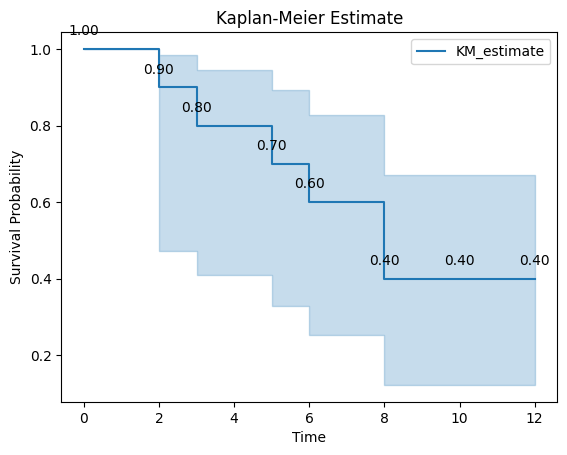

In [7]:
# Plot the survival function
ax = kmf.plot_survival_function()
plt.title('Kaplan-Meier Estimate')
plt.xlabel('Time')
plt.ylabel('Survival Probability')

# Annotate the plot with survival probabilities
for time, survival_prob in zip(kmf.event_table.index, kmf.survival_function_['KM_estimate']):
    plt.annotate(f'{survival_prob:.2f}', (time, survival_prob), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Multiple curves
</h1><center/>

In [9]:
durations_A = np.random.exponential(scale=5, size=50)  # Group A
event_observed_A = np.random.binomial(1, p=0.7, size=50)  # 70% chance of event

durations_B = np.random.exponential(scale=6, size=50)  # Group B
event_observed_B = np.random.binomial(1, p=0.5, size=50)  # 50% chance of event

In [10]:
# Create Kaplan-Meier fitters
kmf_A = KaplanMeierFitter()
kmf_B = KaplanMeierFitter()

In [12]:
# Combine the data into a DataFrame
data = {
    'duration': np.concatenate([durations_A, durations_B]),
    'event_observed': np.concatenate([event_observed_A, event_observed_B]),
    'group': ['A'] * len(durations_A) + ['B'] * len(durations_B)
}
df = pd.DataFrame(data)

In [13]:
# Fit the data for each group
kmf_A.fit(durations=df[df['group'] == 'A']['duration'], event_observed=df[df['group'] == 'A']['event_observed'], label='Drug A')
kmf_B.fit(durations=df[df['group'] == 'B']['duration'], event_observed=df[df['group'] == 'B']['event_observed'], label='Drug B')

<lifelines.KaplanMeierFitter:"Drug B", fitted with 50 total observations, 23 right-censored observations>

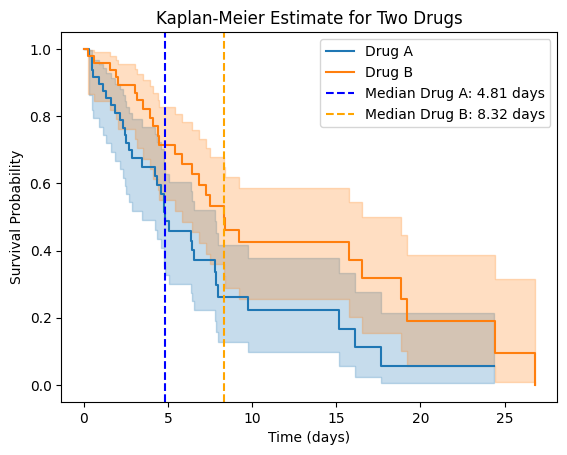

,Time,Survival_Probability_A,Survival_Probability_B
0,0.000000,1.000000,1.00
1,0.095028,1.000000,NaN
2,0.221087,NaN,0.98
3,0.290903,0.979592,NaN
4,0.360345,NaN,0.98


In [16]:
# Extract survival probabilities into a DataFrame
survival_A = kmf_A.survival_function_.reset_index().rename(columns={'timeline': 'Time', 'Drug A': 'Survival_Probability_A'})
survival_B = kmf_B.survival_function_.reset_index().rename(columns={'timeline': 'Time', 'Drug B': 'Survival_Probability_B'})
survival_df = pd.merge(survival_A, survival_B, on='Time', how='outer')

# Calculate median survival times
median_A = kmf_A.median_survival_time_
median_B = kmf_B.median_survival_time_

# Plot the survival functions
ax = kmf_A.plot_survival_function()
kmf_B.plot_survival_function(ax=ax)
plt.title('Kaplan-Meier Estimate for Two Drugs')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')

# Annotate median survival times
plt.axvline(median_A, color='blue', linestyle='--', label=f'Median Drug A: {median_A:.2f} days')
plt.axvline(median_B, color='orange', linestyle='--', label=f'Median Drug B: {median_B:.2f} days')
plt.legend()

plt.show()

# Print the survival probabilities DataFrame
survival_df.head()